In [14]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn para plotear 

In [15]:
#DATASET
empleados = pd.read_csv('Employee.csv', encoding = "ISO-8859-1", delimiter=',')  

### Categoría de pago vs Dejaría la compañía. Gráfico con frecuencias, expresadas en %.

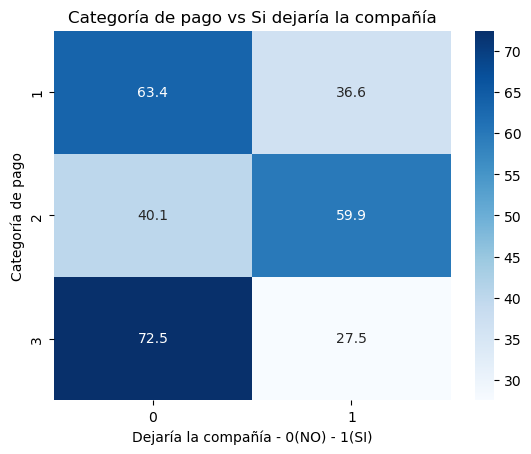

In [21]:

# Calcular los porcentajes sobre filas
tabla = empleados.groupby('PaymentTier')['LeaveOrNot'].value_counts(normalize=True).unstack() * 100

# Crear el mapa de calor utilizando seaborn
sns.heatmap(tabla, annot=True, fmt=".1f", cmap='Blues')

# Agregar etiquetas a los ejes
plt.xlabel('Dejaría la compañía - 0(NO) - 1(SI)')
plt.ylabel('Categoría de pago')

plt.title('Categoría de pago vs Si dejaría la compañía')

# Mostrar el mapa de calor
plt.show()

**Podemos observar en el gráfico que de las tres categorías de pago, en la Categoría 2 se evidencia que el 59.9% de los emplados podría dejar la empresa. Es un punto a tener en cuenta a la hora de tomar acciones. Cabe aclarar que en la categoría 2 se ubica el 19.7% del personal analizado, mientras que en la cat 3 está el 75.1% y en la 1 el 5.2%.**

### Composición de personal por experiencia en el campo

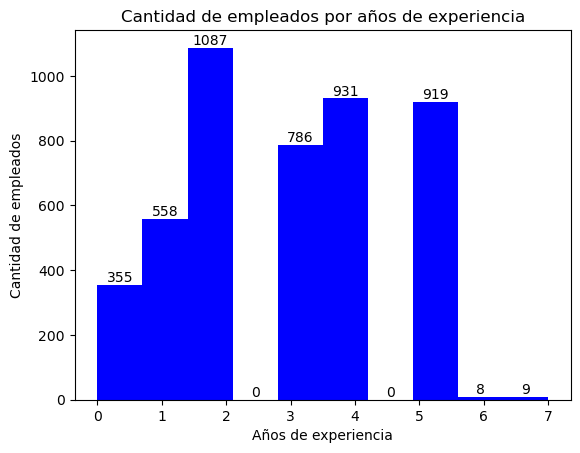

In [17]:
#006 Gráfico de composición de personal por experiencia en el campo#12

# Configuración del gráfico
fig, ax = plt.subplots()

# Crear histograma
ax.hist(empleados['ExperienceInCurrentDomain'], color="blue")

# Etiquetas de los ejes y título
ax.set_xlabel('Años de experiencia')
ax.set_ylabel('Cantidad de empleados')
ax.set_title('Cantidad de empleados por años de experiencia')

# Agregar etiquetas con las cantidades
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


# Mostrar el gráfico
plt.show()

**Se observa que la experiencia que más se repite entre los empleados, es de 2 años.**

### Evolución de ingresos de personal por año

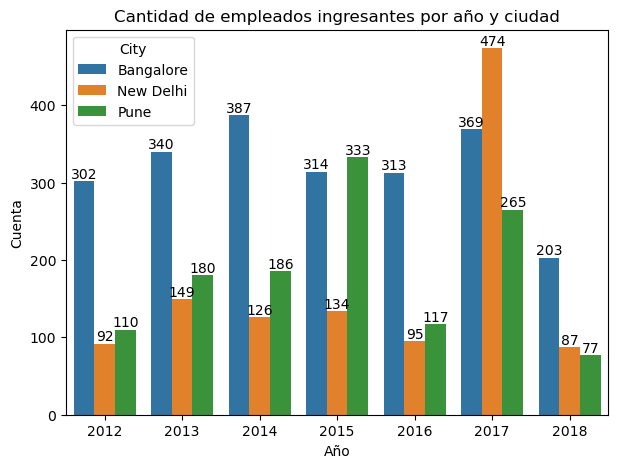

In [18]:
#007 Gráfico de evolución de ingresos de personal por año#13

plt.figure(figsize=(7,5))
tablaciudad = empleados.groupby(['City', 'JoiningYear']).size().reset_index(name='Count')

ax = sns.barplot(x='JoiningYear', y='Count', hue='City', data=tablaciudad)

plt.xlabel('Año')
plt.ylabel('Cuenta')
plt.title('Cantidad de empleados ingresantes por año y ciudad')

# Agregar etiquetas con las cantidades
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

**Se aprecia en 2017 el año con mayor cantidad de personas que ingresaron    
a la compañía, mientras que la ciudad donde más ingresaron ese año fue New Delhi.**

### Gráfico de correlación de variables numéricas

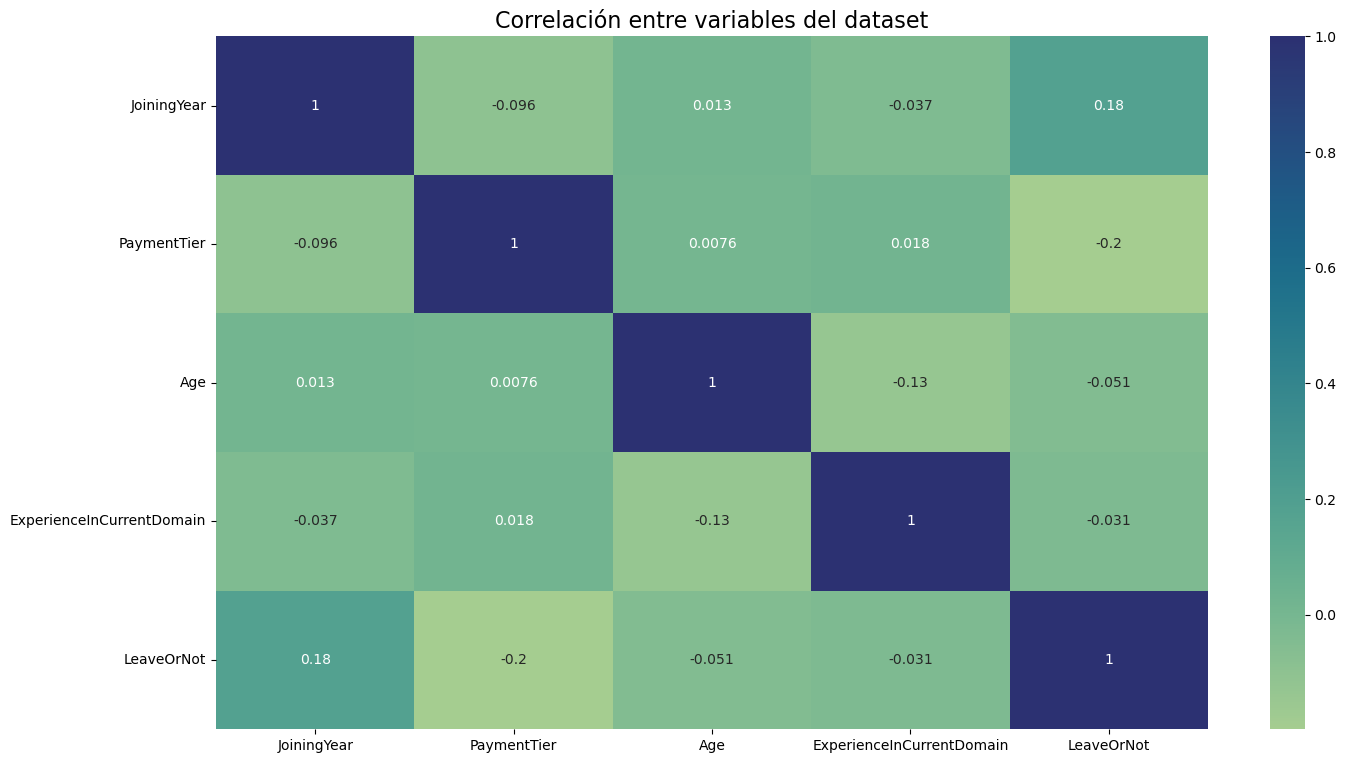

In [19]:
#011 Gráfico de correlación de variables numéricas con lib Seaborn#16

plt.figure(figsize=(16,9))
sns.heatmap(empleados.corr(),annot= True,cmap = 'crest')
plt.title('Correlación entre variables del dataset',fontsize=16)

plt.show()

**El nivel de pago (Payment Tier) y el año de ingreso(joiningyear) son las características que más correlación
tienen con la variable "Si dejaría la compañía"(Leaveornotva), no obstante la misma es baja.**